In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dataset "Drug Classification" https://www.kaggle.com/prathamtripathi/drug-classification


The target feature is **Drug type**


The feature sets are:
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration

In [113]:
drug_df = pd.read_csv("drug.csv")
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [114]:
drug_df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

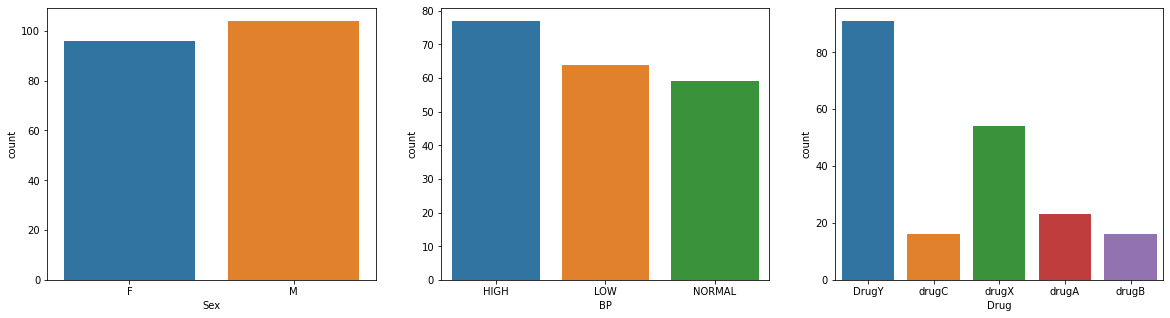

In [115]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
sn.countplot(x="Sex", data=drug_df, ax=axs[0])
sn.countplot(x='BP',data=drug_df, ax=axs[1])
sn.countplot(x='Drug',data=drug_df, ax=axs[2])
plt.show()

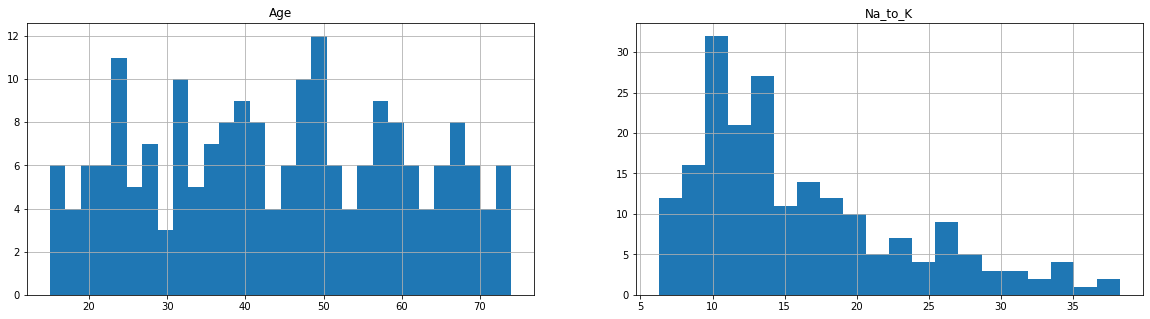

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
drug_df["Age"].hist(bins=30, ax=axs[0])
drug_df["Na_to_K"].hist(bins=20, ax=axs[1])
axs[0].set_title("Age")
axs[1].set_title("Na_to_K")
plt.show()

In [117]:
label_encoder = LabelEncoder()

categorical_features = ["Sex", "Drug", "BP", "Cholesterol"]
for feature in categorical_features:
    print(drug_df[feature].unique())
    drug_df[feature]=label_encoder.fit_transform(drug_df[feature])
    print(drug_df[feature].unique())

['F' 'M']
[0 1]
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
[0 3 4 1 2]
['HIGH' 'LOW' 'NORMAL']
[0 1 2]
['HIGH' 'NORMAL']
[0 1]


In [118]:
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


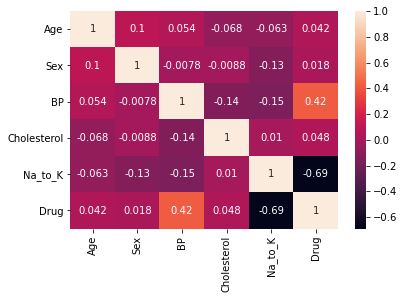

Drug           1.000000
BP             0.419397
Cholesterol    0.048415
Age            0.041856
Sex            0.018239
Na_to_K       -0.689051
Name: Drug, dtype: float64

In [119]:
corrMatrix = drug_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix["Drug"].sort_values(ascending=False)

### Train-Test Split

In [169]:
Y = drug_df['Drug']
X = drug_df.drop(['Drug'],axis = 1)
print(X.shape, Y.shape)

(200, 5) (200,)


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=0)

### Decision Tree

In [175]:
dt_classif = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, random_state=1)

dt_classif.fit(X_train, y_train)

y_pred = dt_classif.predict(X_test)

In [176]:
cm = confusion_matrix(y_pred, y_test)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[47  0  0  0  1]
 [ 0 10  2  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 27]]


In [177]:
accuracy = dt_classif.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.97


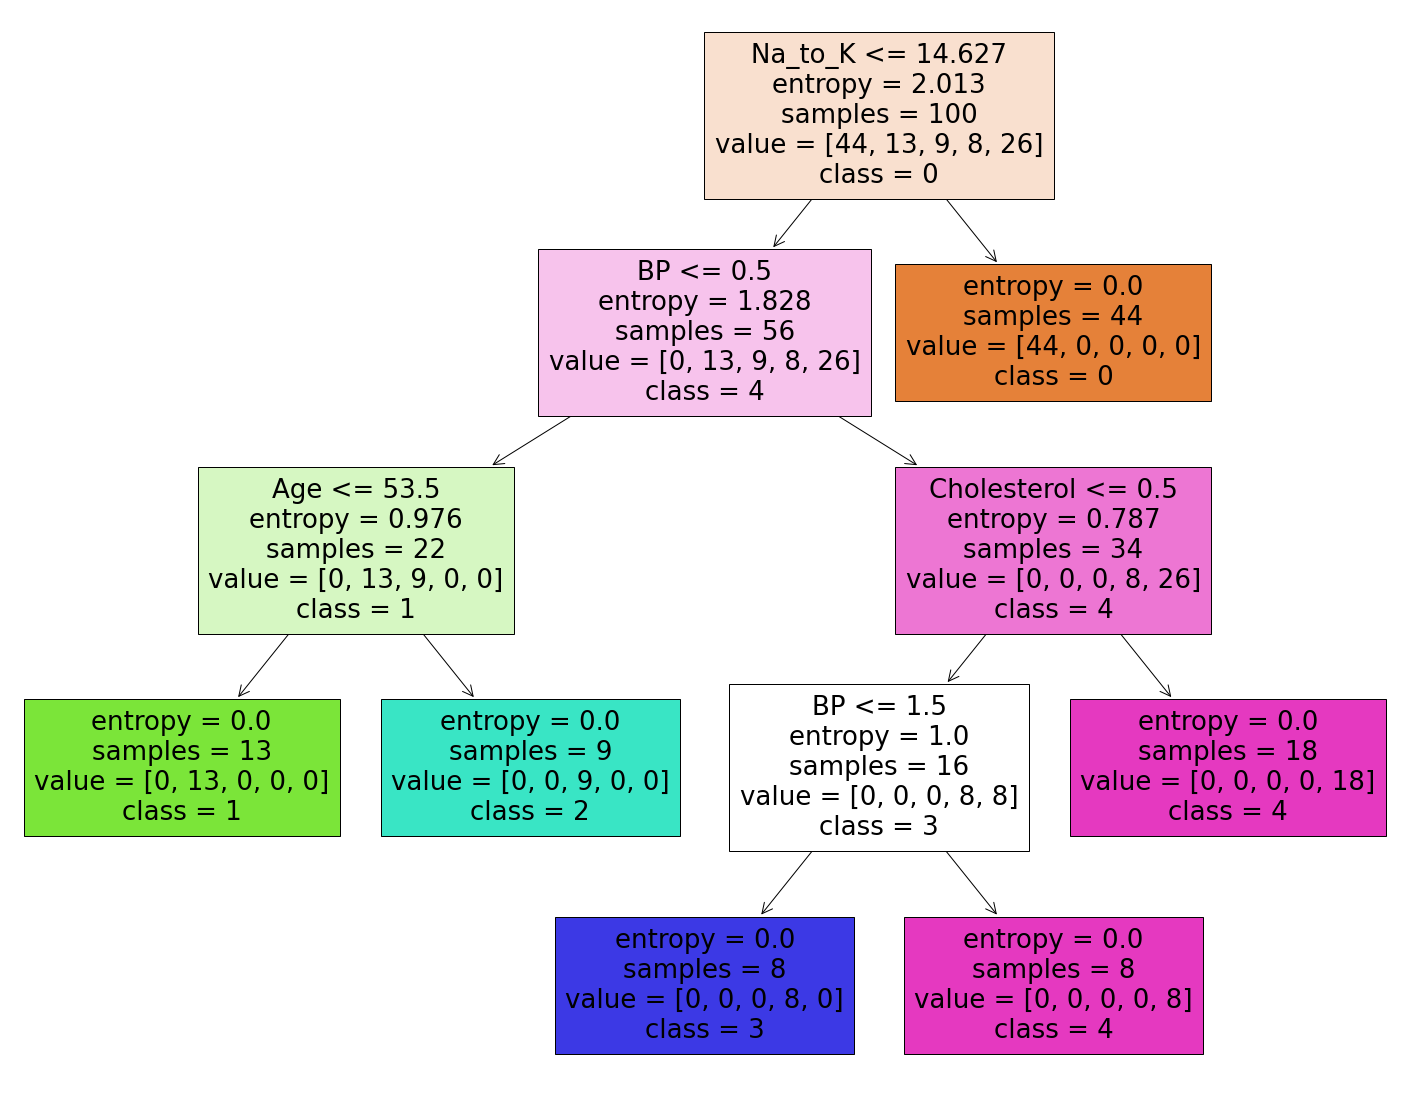

In [125]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

drugs_feature_names = list(drug_df.columns.values)
drugs_feature_names.remove("Drug")

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classif, 
                   feature_names = drugs_feature_names,  
                   class_names = ["0","1","2","3","4"],
                   filled=True)
fig.savefig("drug_decision_tree.png")

### Random Forest

In [161]:
rf_classif = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 1)
rf_classif.fit(X_train, y_train)
y_pred_rf = rf_classif.predict(X_test)

In [162]:
cm = confusion_matrix(y_pred_rf, y_test)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[47  0  0  0  1]
 [ 0 10  2  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0 27]]


In [163]:
accuracy = rf_classif.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.97


In [184]:
for i in range(100, 206, 15):
    rfc =  RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=1)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    print(f"{i} estimators. accuracy=", rfc.score(X_test, y_test))

100 estimators. accuracy= 0.97
115 estimators. accuracy= 0.97
130 estimators. accuracy= 0.97
145 estimators. accuracy= 0.97
160 estimators. accuracy= 0.97
175 estimators. accuracy= 0.97
190 estimators. accuracy= 0.97
205 estimators. accuracy= 0.97
